# Visualization and interpretability of a CNN

## Setup

In [1]:
import requests
from PIL import Image
from saliency import saliency
from gradcam import GradCAM
from torchvision import models, transforms

In [2]:
#load pretrained resnet model
model = models.resnet18(pretrained=True)
print(model)

dimension = (224, 224)
#define transforms to preprocess input image into format expected by model
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])

#transforms to resize image to the size expected by pretrained model,
#convert PIL image to tensor, and
#normalize the image
transform = transforms.Compose([
    transforms.Resize(dimension),
    transforms.ToTensor(),
    normalize,          
])

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

/home/fozame/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/fozame/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


## Saliency maps

Indice of the best score: tensor([272])
Score: tensor([3.8550], grad_fn=<MaxBackward0>)


/home/fozame/Documents/articles and books/articles/gradcam and saliency/saliency.py:64: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


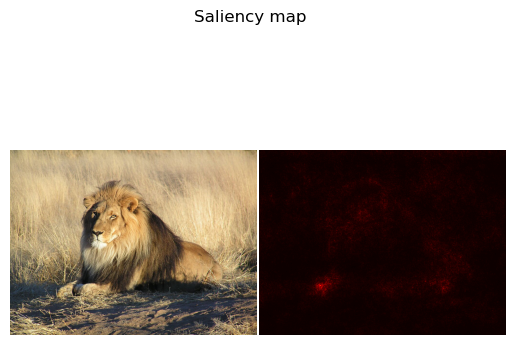

In [3]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/7/73/Lion_waiting_in_Namibia.jpg/1024px-Lion_waiting_in_Namibia.jpg'
image = Image.open(requests.get(url, stream = True).raw).convert("RGB")
saliency(image, model)

Indice of the best score: tensor([291])
Score: tensor([29.1602], grad_fn=<MaxBackward0>)


/home/fozame/Documents/articles and books/articles/gradcam and saliency/saliency.py:64: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


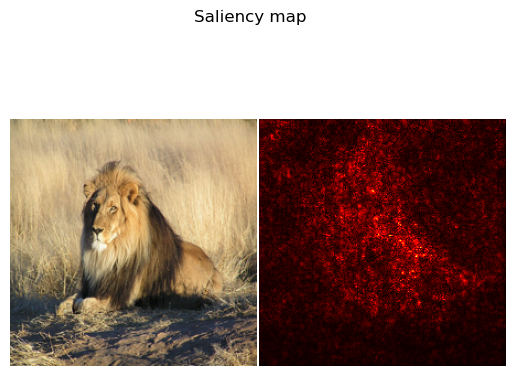

In [4]:
image_r = image.resize(dimension)
saliency(image_r, model, transform=transform)

It is observed that a transformed image can exhibit a saliency map that is initially less interpretable, yet be associated with a higher confidence score than the original image, whose saliency map clearly highlights a lion.

This observation suggests that a model's ability to accurately detect an object is not necessarily correlated with the ease of interpretation of its saliency map. More performant models, such as ResNet-50 and ResNet-101, may produce less intuitive saliency maps for the original image, despite achieving high confidence scores.

This increased complexity in saliency maps could be attributed to the ability of deeper models to capture subtle and abstract features that contribute to classification, but which are not immediately apparent to the human eye. Analysis of these more complex saliency maps may require additional expertise or specialized interpretation tools to derive meaningful insights.

## GradCAM

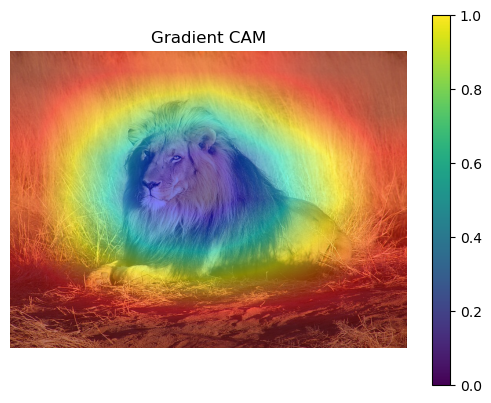

In [5]:
gcam = GradCAM(image = image, model = model, target_layer = 'layer4.1.conv2', transform = transform) #We use the 'layer4.1.conv2' because it is last layer of resnet18

preds, _ = gcam.forward()
class_idx = preds.argmax().item()
gcam.visualize(class_idx)